# 8 Deep Learning

8.1 Use a pre-trained ResNet50 and VGG16 on Keras to implement an inference of the test image in this directory!

* Example: <https://keras.io/applications/>


8.2 Use a pre-trained ResNet50 and VGG16 on PyTorch to implement an inference of the test image in this directory!

* Example: http://pytorch.org/docs/master/torchvision/models.html

8.3 Compare the inference times of both networks and frameworks!

8.4 Find two positive and negative sample images that are correctly/incorrectly classified!


In [2]:
import os, sys
import tensorflow as tf
os.chdir(os.path.join(os.environ["HOME"], "exercise-students-2020/08_DeepLearning"))
os.environ["KERAS_BACKEND"]="tensorflow"
import keras
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input as resnet_preprocess_input, decode_predictions as resnet_decode_predictions
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input as vgg_preprocess_input, decode_predictions as vgg_decode_predictions
import numpy as np
from keras.preprocessing.image import load_img, img_to_array

Using TensorFlow backend.


In [3]:
resnet = ResNet50()
vgg = VGG16()

In [4]:
image = img_to_array(load_img('test_image.jpg' , target_size=(224, 224)))
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

In [5]:
resnet_decode_predictions(resnet.predict(resnet_preprocess_input(image)))

[[('n04604644', 'worm_fence', 0.07046478),
  ('n02793495', 'barn', 0.0686209),
  ('n03000134', 'chainlink_fence', 0.061941594),
  ('n04326547', 'stone_wall', 0.05747776),
  ('n03930313', 'picket_fence', 0.05441839)]]

In [6]:
vgg_decode_predictions(vgg.predict(vgg_preprocess_input(image)))

[[('n02793495', 'barn', 0.3092531),
  ('n03028079', 'church', 0.23857628),
  ('n03743016', 'megalith', 0.09048893),
  ('n04604644', 'worm_fence', 0.06188944),
  ('n03891251', 'park_bench', 0.05850323)]]

In [7]:
import torch
import torchvision.models as models

In [8]:
vgg16 = models.vgg16(pretrained=True)
resnext50_32x4d = models.resnext50_32x4d(pretrained=True)

In [9]:
vgg16.eval()
resnext50_32x4d.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
      (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(128, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1

In [10]:
from PIL import Image
img = Image.open('test_image.jpg')

In [11]:
from torchvision import transforms
transform = transforms.Compose([
    transforms.Resize(224),
    transforms.ToTensor(), 
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406], 
        std=[0.229, 0.224, 0.225]
    )
])


In [12]:
def classify(model, decoder, img):
    return decoder(model(torch.unsqueeze(transform(img), 0)).detach().numpy())

In [13]:
classify(vgg16, vgg_decode_predictions, img)

[[('n02793495', 'barn', 7.1604614),
  ('n04604644', 'worm_fence', 7.028587),
  ('n03891251', 'park_bench', 6.6059346),
  ('n07802026', 'hay', 6.1398897),
  ('n02965783', 'car_mirror', 6.0873003)]]

In [14]:
classify(resnext50_32x4d, resnet_decode_predictions, img)

[[('n04604644', 'worm_fence', 9.05752),
  ('n02793495', 'barn', 7.4780717),
  ('n04326547', 'stone_wall', 6.7159877),
  ('n03891251', 'park_bench', 6.4993634),
  ('n03743016', 'megalith', 6.4531875)]]

In [15]:
img = torch.unsqueeze(transform(img), 0)

In [16]:
%%time
_ = vgg16(img)

CPU times: user 800 ms, sys: 191 ms, total: 991 ms
Wall time: 101 ms


In [17]:
%%time
_ = resnext50_32x4d(img)

CPU times: user 629 ms, sys: 399 ms, total: 1.03 s
Wall time: 103 ms


In [18]:
resnet_image = resnet_preprocess_input(image)
vgg_image = vgg_preprocess_input(image)

In [19]:
%%time
_ = resnet.predict(resnet_image)

CPU times: user 819 ms, sys: 889 ms, total: 1.71 s
Wall time: 173 ms


In [20]:
%%time
_ = vgg.predict(resnet_image)

CPU times: user 1.22 s, sys: 1.12 s, total: 2.34 s
Wall time: 236 ms


#### Explanation
Time used to infere an image can vary a lot even on the same framework and architecture, that's why it's not possible to distinguish quickly what framework is faster.

In [33]:
!wget https://upload.wikimedia.org/wikipedia/commons/thumb/9/93/Golden_Retriever_Carlos_%2810581910556%29.jpg/640px-Golden_Retriever_Carlos_%2810581910556%29.jpg

--2020-04-17 21:56:18--  https://upload.wikimedia.org/wikipedia/commons/thumb/9/93/Golden_Retriever_Carlos_%2810581910556%29.jpg/640px-Golden_Retriever_Carlos_%2810581910556%29.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 91.198.174.208, 2620:0:862:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|91.198.174.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109779 (107K) [image/jpeg]
Saving to: ‘640px-Golden_Retriever_Carlos_(10581910556).jpg’

640px-Golden_Retrie 100%[===================>] 107.21K  --.-KB/s    in 0.05s   

2020-04-17 21:56:18 (1.94 MB/s) - ‘640px-Golden_Retriever_Carlos_(10581910556).jpg’ saved [109779/109779]



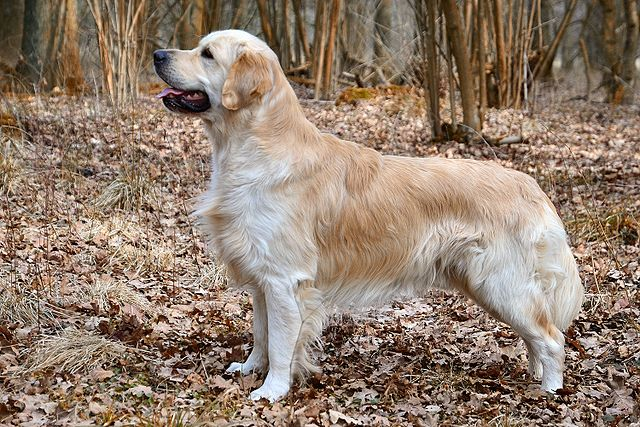

In [4]:
from IPython.display import Image 
Image("640px-Golden_Retriever_Carlos_(10581910556).jpg")

In [5]:
#t-shirt with golden retriever photo
!wget https://cdn11.bigcommerce.com/s-86394/images/stencil/1280x1280/products/8887/109762/10_3743_web__17480.1525193078.jpg

--2020-04-18 13:36:25--  https://cdn11.bigcommerce.com/s-86394/images/stencil/1280x1280/products/8887/109762/10_3743_web__17480.1525193078.jpg
Resolving cdn11.bigcommerce.com (cdn11.bigcommerce.com)... 2.21.36.136, 2a02:26f0:64:5ad::c20, 2a02:26f0:64:588::c20
Connecting to cdn11.bigcommerce.com (cdn11.bigcommerce.com)|2.21.36.136|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159389 (156K) [image/jpeg]
Saving to: ‘10_3743_web__17480.1525193078.jpg’

10_3743_web__17480. 100%[===================>] 155.65K  --.-KB/s    in 0.02s   

2020-04-18 13:36:25 (6.76 MB/s) - ‘10_3743_web__17480.1525193078.jpg’ saved [159389/159389]



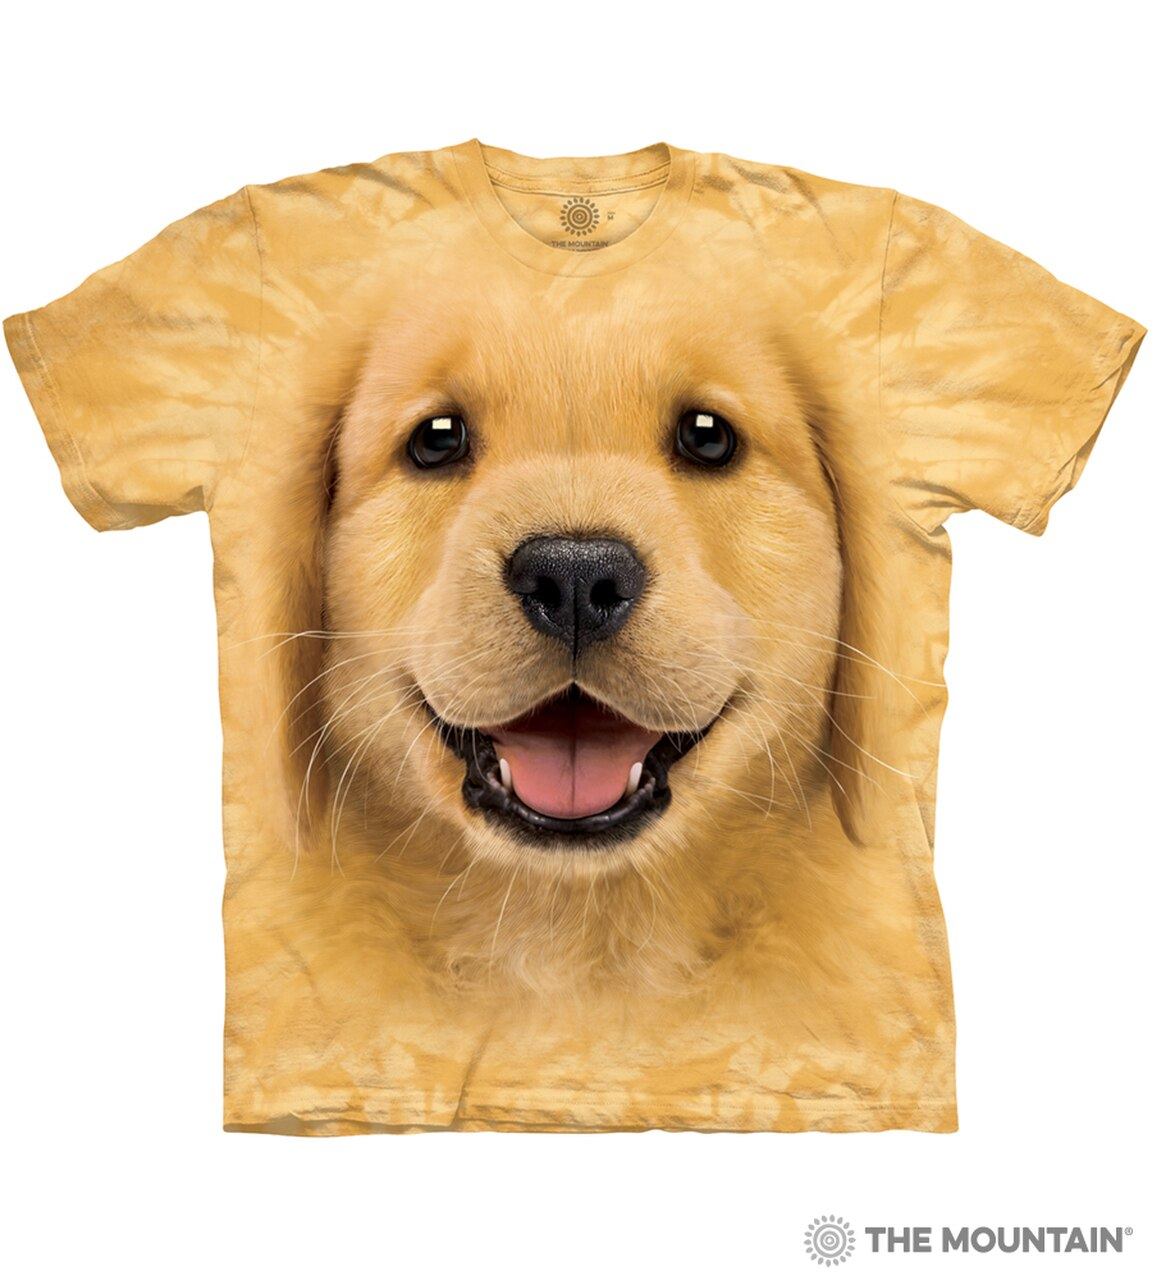

In [6]:
Image("10_3743_web__17480.1525193078.jpg")

In [7]:
# Golden Retriever with lion mane
!wget https://i.pinimg.com/originals/67/89/7d/67897dd836e291a90e46684795894801.jpg

--2020-04-18 13:36:35--  https://i.pinimg.com/originals/67/89/7d/67897dd836e291a90e46684795894801.jpg
Resolving i.pinimg.com (i.pinimg.com)... 151.101.112.84, 2a04:4e42:1b::84
Connecting to i.pinimg.com (i.pinimg.com)|151.101.112.84|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 138639 (135K) [image/jpeg]
Saving to: ‘67897dd836e291a90e46684795894801.jpg’

67897dd836e291a90e4 100%[===================>] 135.39K  --.-KB/s    in 0.03s   

2020-04-18 13:36:36 (4.77 MB/s) - ‘67897dd836e291a90e46684795894801.jpg’ saved [138639/138639]



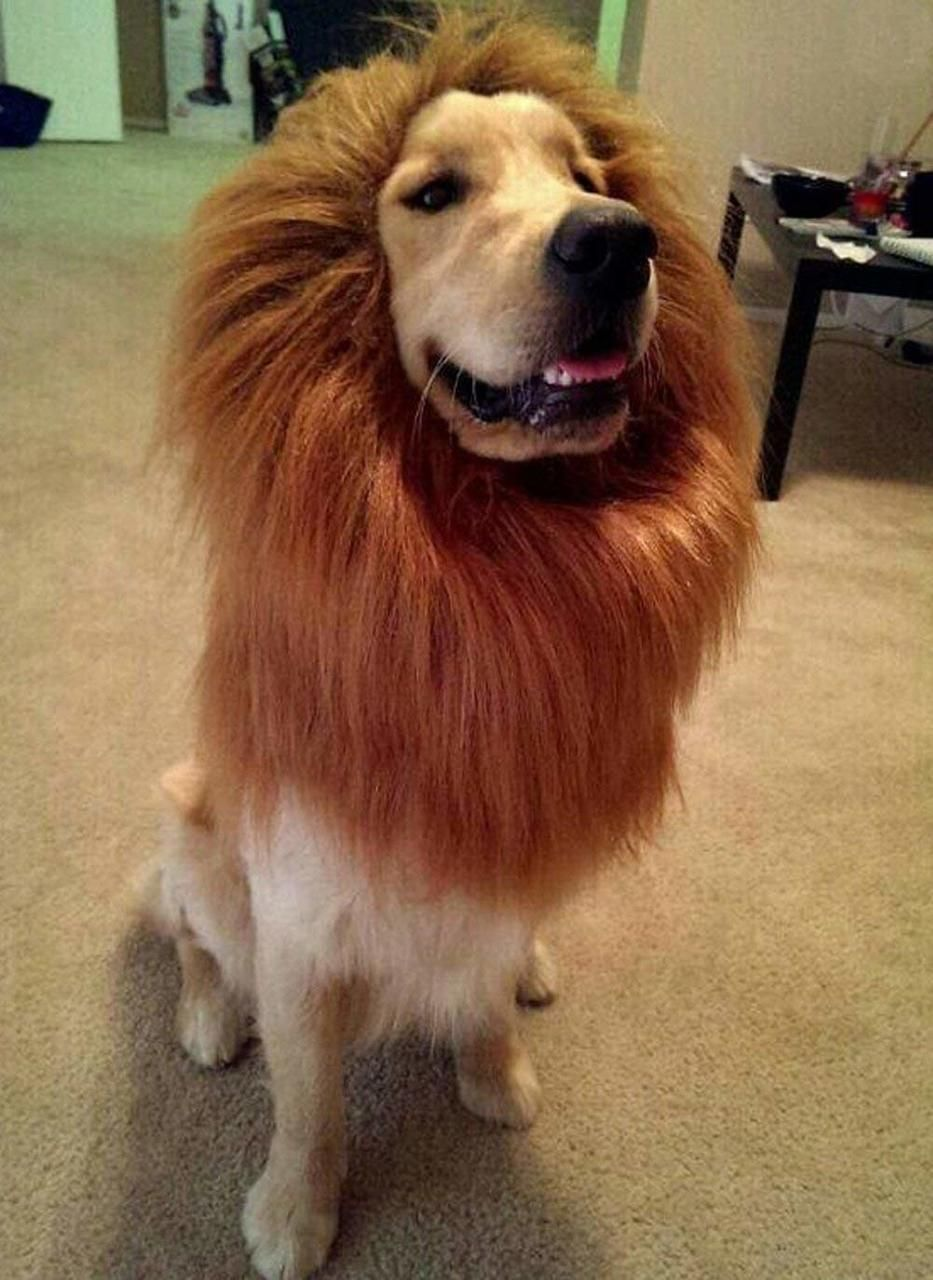

In [9]:
Image("67897dd836e291a90e46684795894801.jpg")

In [14]:
#pretzel
!wget https://cdn.shopify.com/s/files/1/0614/0993/products/3oz_grande.jpg

--2020-04-18 13:37:40--  https://cdn.shopify.com/s/files/1/0614/0993/products/3oz_grande.jpg
Resolving cdn.shopify.com (cdn.shopify.com)... 151.101.112.104, 2a04:4e42:1b::104
Connecting to cdn.shopify.com (cdn.shopify.com)|151.101.112.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 56283 (55K) [image/jpeg]
Saving to: ‘3oz_grande.jpg’

3oz_grande.jpg      100%[===================>]  54.96K  --.-KB/s    in 0.02s   

2020-04-18 13:37:40 (2.99 MB/s) - ‘3oz_grande.jpg’ saved [56283/56283]



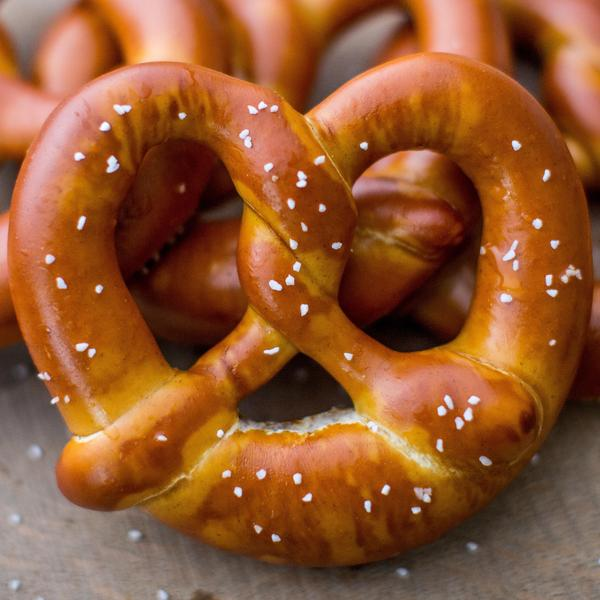

In [15]:
Image("3oz_grande.jpg")

In [21]:
def test_photo(path):
    image = img_to_array(load_img(path , target_size=(224, 224)))
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    print(resnet_decode_predictions(resnet.predict(resnet_preprocess_input(image))))

In [34]:
# correct 1 
test_photo('640px-Golden_Retriever_Carlos_(10581910556).jpg')

[[('n02099601', 'golden_retriever', 0.5877941), ('n02090622', 'borzoi', 0.17026699), ('n02104029', 'kuvasz', 0.096588254), ('n02100735', 'English_setter', 0.031283416), ('n02115641', 'dingo', 0.014025919)]]


In [32]:
# correct 2
test_photo("3oz_grande.jpg?v=1475243326")

[[('n07695742', 'pretzel', 1.0), ('n07693725', 'bagel', 1.5860373e-08), ('n01930112', 'nematode', 5.84493e-09), ('n03065424', 'coil', 1.4448905e-09), ('n03627232', 'knot', 8.640055e-10)]]


In [28]:
# incorrect 1 - should be t-shirt
test_photo('10_3743_web__17480.1525193078.jpg')

[[('n02112137', 'chow', 0.51466596), ('n02099601', 'golden_retriever', 0.34983584), ('n02099712', 'Labrador_retriever', 0.04675648), ('n04399382', 'teddy', 0.012992809), ('n02104029', 'kuvasz', 0.010344688)]]


In [30]:
# incorrect 2 - golden retriever is the third choice
test_photo('67897dd836e291a90e46684795894801.jpg')

[[('n02112137', 'chow', 0.30618408), ('n02112018', 'Pomeranian', 0.27285945), ('n02099601', 'golden_retriever', 0.09425962), ('n02096294', 'Australian_terrier', 0.031824656), ('n02105855', 'Shetland_sheepdog', 0.01972645)]]
